In [10]:
# !pip install contextily

In [11]:
import geopandas as gpd

In [12]:
from matplotlib import pyplot as plt

In [13]:
import contextily as ctx

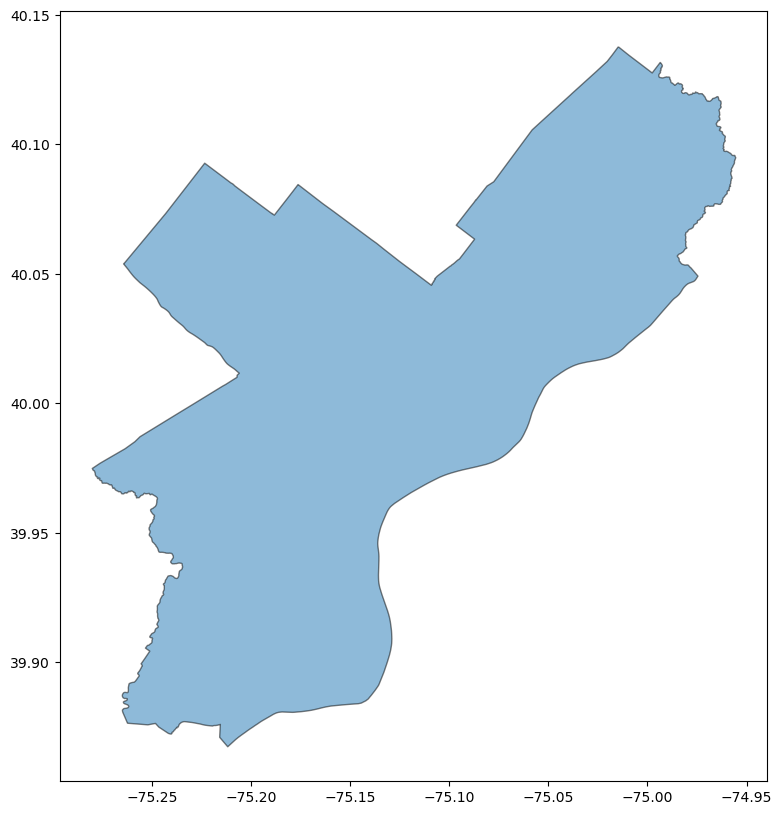

In [14]:
# first Read the city limit of Phily and plot the phily map
city_limit_shp = 'data/city_limit/City_Limits.shp'
phily_limit_df = gpd.read_file(city_limit_shp)

ax = phily_limit_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [15]:
phily_limit_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
phily_limit_df_2279 = phily_limit_df.to_crs(epsg=2279) ## 2279 is the epsg code of Philadelphia, https://spatialreference.org/ref/epsg/
phily_limit_df_2279.crs

<Projected CRS: EPSG:2279>
Name: NAD83 / Texas South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Texas - SPCS83 - S
- bounds: (-100.2, 25.83, -96.85, 28.21)
Coordinate Operation:
- name: SPCS83 Texas South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

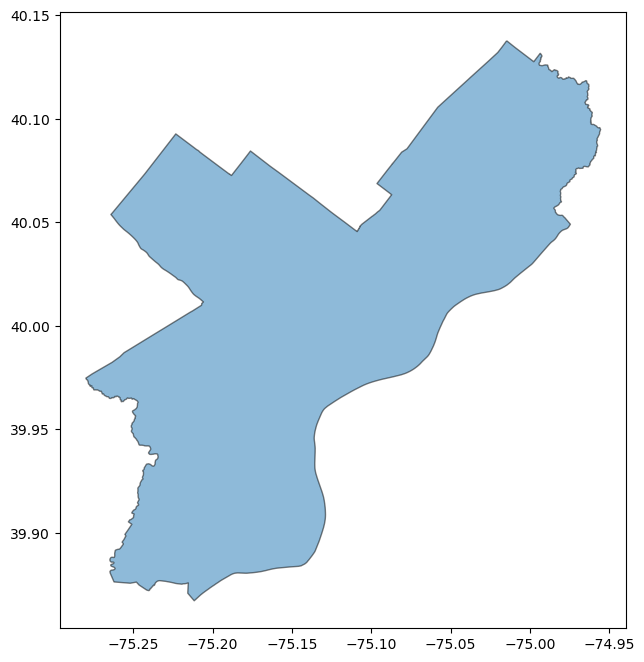

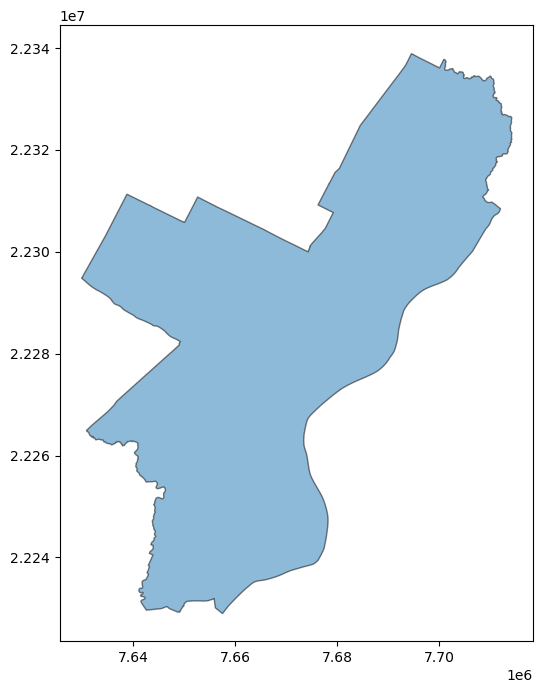

In [17]:
ax = phily_limit_df.plot(figsize=(8, 8), alpha=0.5, edgecolor='k')
ax = phily_limit_df_2279.plot(figsize=(8, 8), alpha=0.5, edgecolor='k')

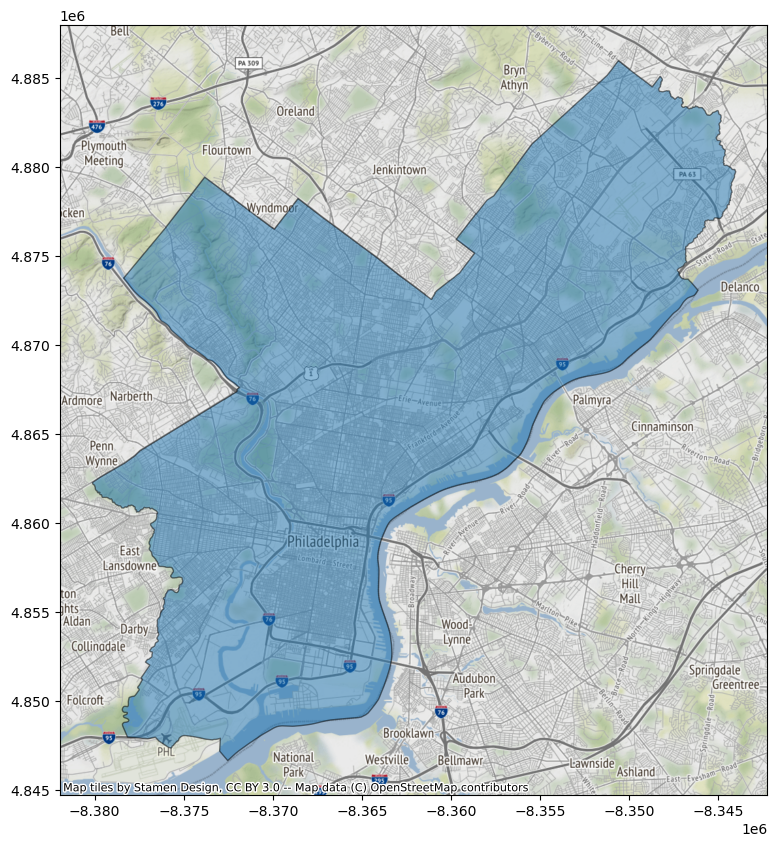

In [18]:
phily_limit_df_3857 = phily_limit_df.to_crs(epsg=3857) ## 3857 the epsg code of web mercator projectionn, https://spatialreference.org/ref/epsg/

ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

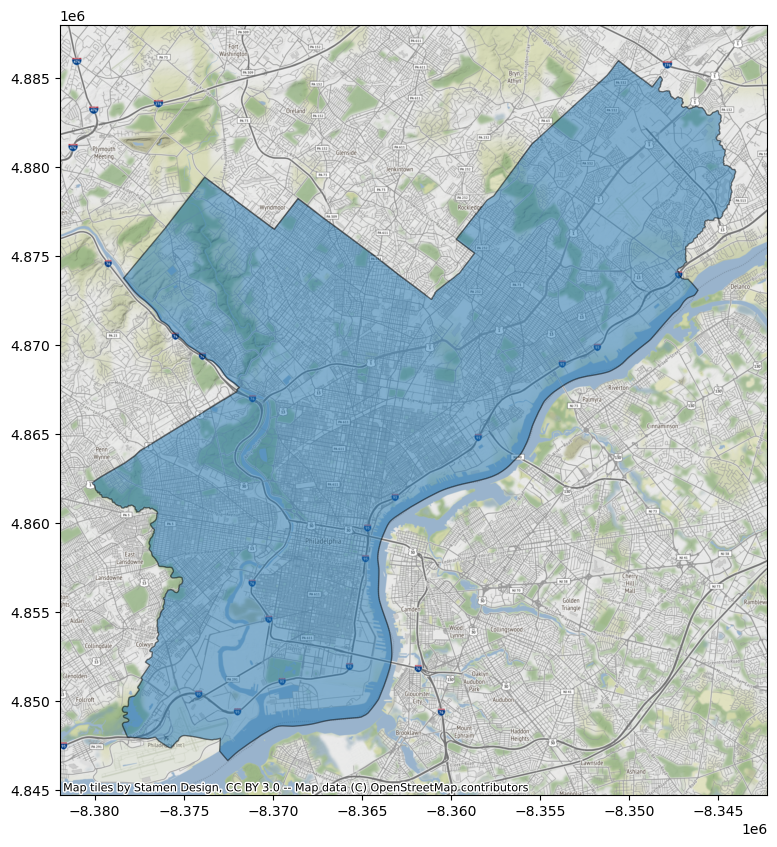

In [19]:
ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=13)

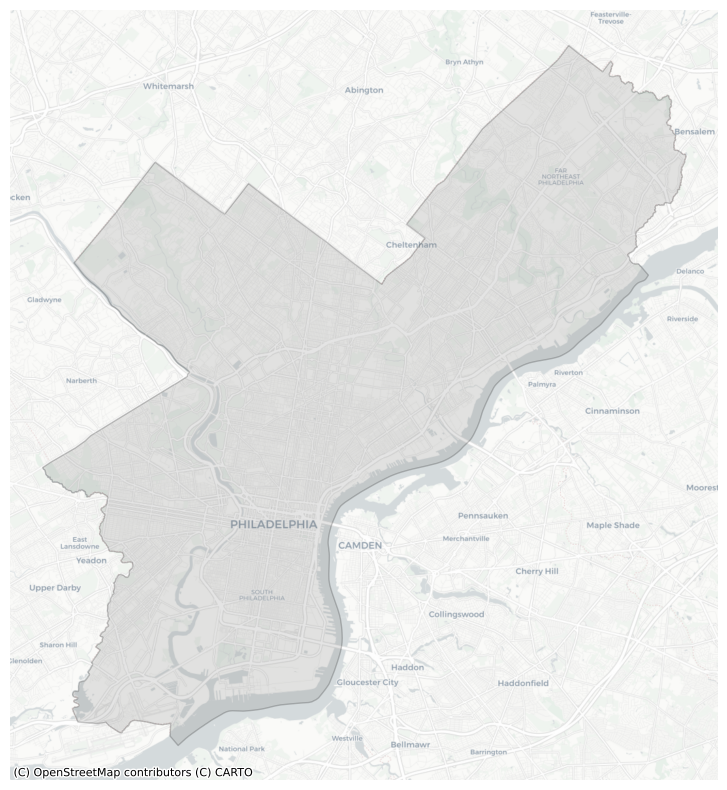

In [20]:
ax = phily_limit_df_3857.plot(figsize=(10, 10), alpha=0.2, edgecolor='k', color='grey')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()

In [21]:
ls data

 Volume in drive C is Windows
 Volume Serial Number is 7AF3-28A8

 Directory of C:\Users\TUP03780\lab3\data

09/15/2022  02:50 PM    <DIR>          .
09/15/2022  02:50 PM    <DIR>          ..
09/15/2022  01:59 PM    <DIR>          __MACOSX
09/15/2022  02:50 PM    <DIR>          census-tract-data
09/15/2022  02:47 PM    <DIR>          city_limit
09/15/2022  02:48 PM    <DIR>          crashdata
               0 File(s)              0 bytes
               6 Dir(s)  814,564,782,080 bytes free


In [22]:
import geopandas as gpd
from matplotlib import pyplot as plt

# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crashdata/crash_data_collision_crash_2007_2017.shp'

car_crash_df = gpd.read_file(crash_data_shp)

In [23]:
car_crash_df.head()

county_nam  objectid_1  objectid         crn  district  county  municipali  \
0       None        9498    128198  2016019772         6      67       67301   
1       None        9570    128432  2016013724         6      67       67301   
2       None        9642    128688  2016038282         6      67       67301   
3       None        9714    128842  2016052220         6      67       67301   
4       None        9786    128975  2016087187         6      67       67301   

   crash_year  crash_mont  day_of_wee  ...  ped_count  ped_death_  ped_maj_in  \
0        2016           2           2  ...          1           0           0   
1        2016           1           3  ...          0           0           0   
2        2016           3           5  ...          0           0           0   
3        2016           2           5  ...          0           0           0   
4        2016           8           6  ...          1           0           0   

   max_severi  comm_veh_c  dec_lat  dec_long rdwy_surf_ wz_law_off  \
0           3           0  40.0628  -75.0577       None       None   
1           3           0  40.0822  -74.9669       None       None   
2           0           1  39.9751  -75.1946       None       None   
3           8           0  40.0357  -75.2171       None       None   
4           4           0  39.9511  -75.1721       None       None   

                     geometry  
0  POINT (-75.05770 40.06280)  
1  POINT (-74.96690 40.08220)  
2  POINT (-75.19460 39.97510)  
3  POINT (-75.21710 40.03570)  
4  POINT (-75.17210 39.95110)  

[5 rows x 91 columns]

Text(0.5, 1.0, 'Traffic accident in 2015')

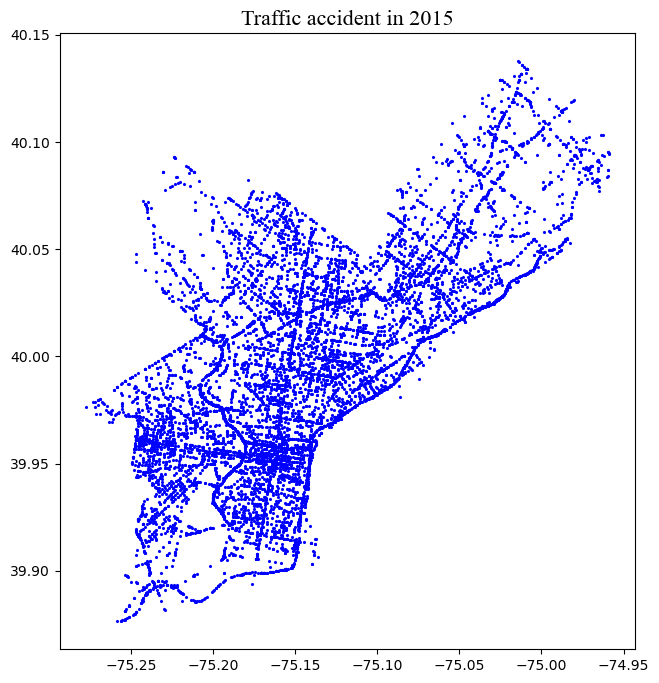

In [25]:
accident_2015 = car_crash_df.loc[car_crash_df['crash_year'] == 2015] #locate the traffic accident in 2015

# prepare the axis and coordinate
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# plot the geopandas dataframe, we read from shapefile
accident_2015.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2015', fontsize='16', fontname='Times New Roman')

In [26]:
car_crash_df.head()

county_nam  objectid_1  objectid         crn  district  county  municipali  \
0       None        9498    128198  2016019772         6      67       67301   
1       None        9570    128432  2016013724         6      67       67301   
2       None        9642    128688  2016038282         6      67       67301   
3       None        9714    128842  2016052220         6      67       67301   
4       None        9786    128975  2016087187         6      67       67301   

   crash_year  crash_mont  day_of_wee  ...  ped_count  ped_death_  ped_maj_in  \
0        2016           2           2  ...          1           0           0   
1        2016           1           3  ...          0           0           0   
2        2016           3           5  ...          0           0           0   
3        2016           2           5  ...          0           0           0   
4        2016           8           6  ...          1           0           0   

   max_severi  comm_veh_c  dec_lat  dec_long rdwy_surf_ wz_law_off  \
0           3           0  40.0628  -75.0577       None       None   
1           3           0  40.0822  -74.9669       None       None   
2           0           1  39.9751  -75.1946       None       None   
3           8           0  40.0357  -75.2171       None       None   
4           4           0  39.9511  -75.1721       None       None   

                     geometry  
0  POINT (-75.05770 40.06280)  
1  POINT (-74.96690 40.08220)  
2  POINT (-75.19460 39.97510)  
3  POINT (-75.21710 40.03570)  
4  POINT (-75.17210 39.95110)  

[5 rows x 91 columns]

Text(0.5, 1.0, 'Traffic accident in 2015')

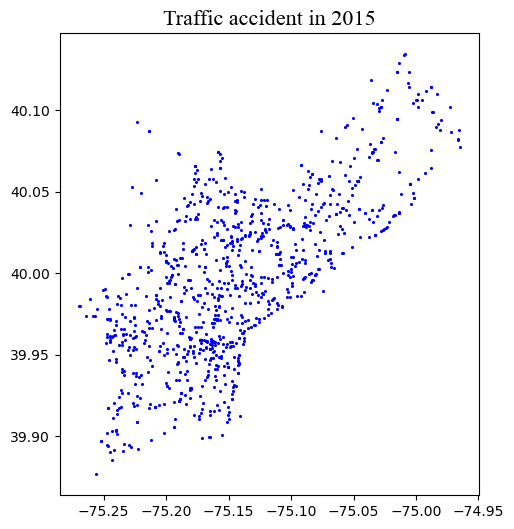

In [27]:
accident_2015_sep = car_crash_df.loc[(car_crash_df['crash_year'] == 2015) & (car_crash_df['crash_mont'] == 9)] #locate the traffic accident in 2015

# prepare the axis and coordinate
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the geopandas dataframe, we read from shapefile
accident_2015_sep.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2015', fontsize='16', fontname='Times New Roman')

<AxesSubplot:>

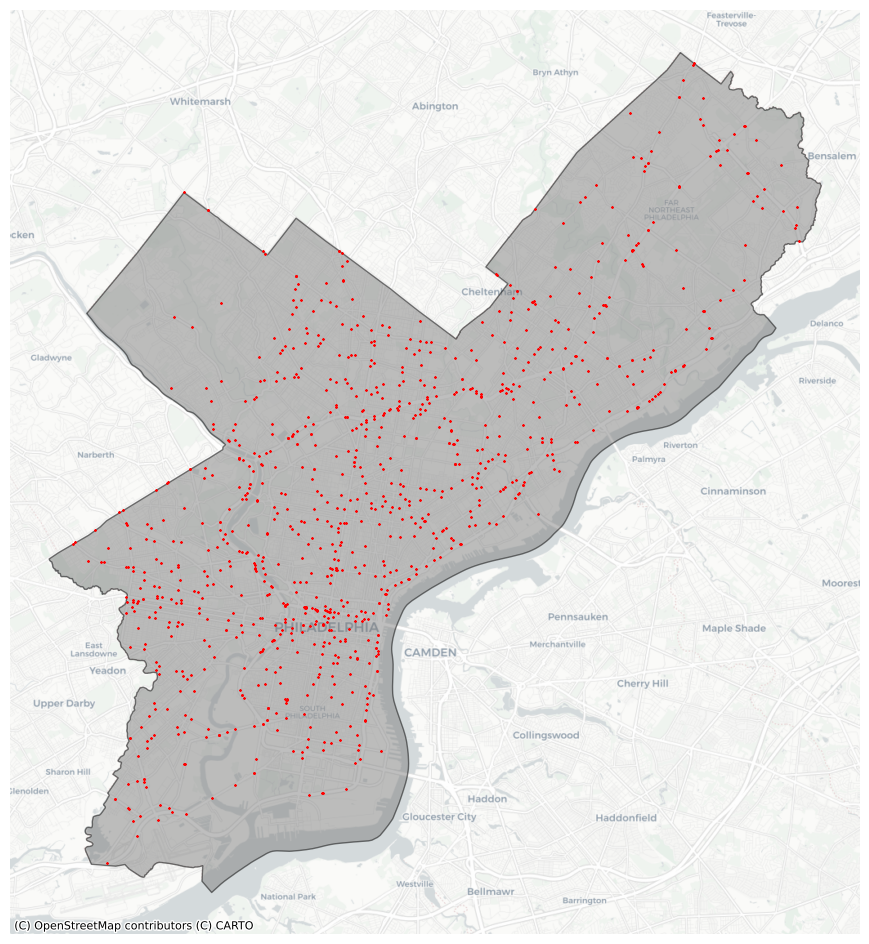

In [28]:
# prepare the plot and the axis
fig, ax = plt.subplots(1, figsize=(12, 12))

# plot the city limit
phily_limit_df_3857.plot(figsize=(10, 10), ax=ax, alpha=0.5, color='grey', edgecolor='k')

# add the basemap to your plot
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()


# plot the traffic accident points
car_crash_df = accident_2015_sep.to_crs(epsg=3857)
car_crash_df.plot(marker='*', ax=ax, color='red', alpha = 1, markersize=1)

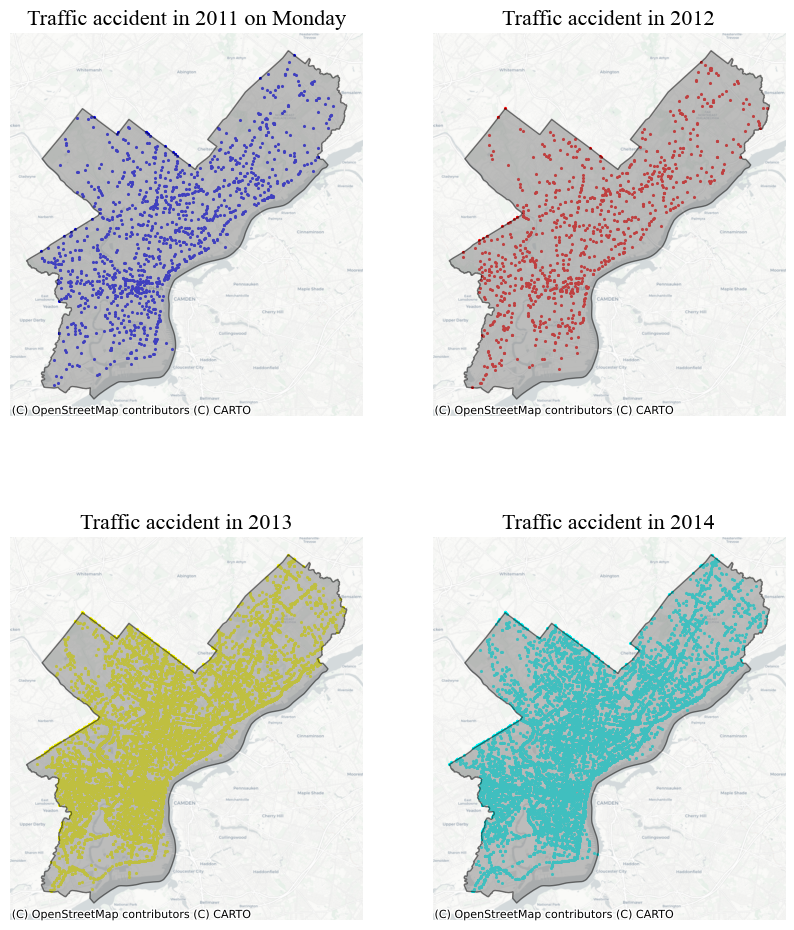

In [29]:
# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crashdata/crash_data_collision_crash_2007_2017.shp'

car_crash_df = gpd.read_file(crash_data_shp)


accident = car_crash_df.to_crs(epsg=3857)

fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# check the accident in 2011 and second day of one week,
accident_yr = accident.loc[(accident['crash_year'] == 2011) & (accident['day_of_wee'] == 2)]
accident_yr.plot(marker='*', ax=ax[0][0], color='blue', markersize=2)
ax[0][0].set_title('Traffic accident in 2011 on Monday', fontsize='16', fontname='Times New Roman')

# plot the city limit
phily_limit_df_3857.plot(ax=ax[0][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][0], source=ctx.providers.CartoDB.Positron)
ax[0][0].set_axis_off()


# accident of 2012 and September
accident_yr = accident.loc[(accident['crash_year'] == 2012) & ((accident['crash_mont'] == 9))]
accident_yr.plot(marker='*', ax=ax[0][1], color='red', markersize=2)
ax[0][1].set_title('Traffic accident in 2012', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[0][1], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][1], source=ctx.providers.CartoDB.Positron)
ax[0][1].set_axis_off()



# accident of 2013
accident_yr = accident.loc[accident['crash_year'] == 2013]
accident_yr.plot(marker='*', ax=ax[1][0], color='yellow', markersize=2)
ax[1][0].set_title('Traffic accident in 2013', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[1][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[1][0], source=ctx.providers.CartoDB.Positron)
ax[1][0].set_axis_off()



# accident of 2014
accident_yr = accident.loc[accident['crash_year'] == 2014]
accident_yr.plot(marker='*', ax=ax[1][1], color='cyan', markersize=2)
ax[1][1].set_title('Traffic accident in 2014', fontsize='16', fontname='Times New Roman')
phily_limit_df_3857.plot(ax=ax[1][1], alpha=0.5, color='grey', edgecolor='k')

ctx.add_basemap(ax[1][1], source=ctx.providers.CartoDB.Positron)
ax[1][1].set_axis_off()

In [44]:
ls "data/census-tract-data"

 Volume in drive C is Windows
 Volume Serial Number is 7AF3-28A8

 Directory of C:\Users\TUP03780\lab3\data\census-tract-data

09/15/2022  02:50 PM    <DIR>          .
09/15/2022  02:50 PM    <DIR>          ..
09/15/2022  02:50 PM    <DIR>          __MACOSX
05/27/2020  04:10 PM                 5 census-tract-data.cpg
05/27/2020  04:10 PM         1,275,138 census-tract-data.dbf
05/27/2020  04:10 PM               165 census-tract-data.prj
05/27/2020  04:10 PM               298 census-tract-data.qpj
05/27/2020  04:10 PM           491,476 census-tract-data.shp
05/27/2020  04:10 PM             3,172 census-tract-data.shx
               6 File(s)      1,770,254 bytes
               3 Dir(s)  814,085,423,104 bytes free


In [45]:
import geopandas as gpd
censusMap = gpd.read_file("data/census-tract-data/census-tract-data.shp")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
accident_yr.crs, censusMap.crs

(<Projected CRS: EPSG:3857>
 Name: WGS 84 / Pseudo-Mercator
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: World - 85°S to 85°N
 - bounds: (-180.0, -85.06, 180.0, 85.06)
 Coordinate Operation:
 - name: Popular Visualisation Pseudo-Mercator
 - method: Popular Visualisation Pseudo Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [47]:
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')

accident_yr_reprojected.head()

county_nam  objectid_1  objectid         crn  district  county  \
34175       None       34176    405616  2014049838         6      67   
34176       None       34177    405617  2014049892         6      67   
34177       None       34178    405618  2014052474         6      67   
34178       None       34179    405625  2014059008         6      67   
34179       None       34180    405632  2014068002         6      67   

       municipali  crash_year  crash_mont  day_of_wee  ...  ped_count  \
34175       67301        2014           3           6  ...          0   
34176       67301        2014           4           3  ...          0   
34177       67301        2014           5           7  ...          0   
34178       67301        2014           5           6  ...          0   
34179       67301        2014           5           6  ...          0   

       ped_death_  ped_maj_in  max_severi  comm_veh_c  dec_lat  dec_long  \
34175           0           0           8           0  40.0290  -75.1061   
34176           0           0           8           0  39.9866  -75.2052   
34177           0           0           0           0  39.9584  -75.1807   
34178           0           0           8           0  39.9956  -75.1725   
34179           0           0           8           0  40.0576  -75.0765   

      rdwy_surf_ wz_law_off                    geometry  
34175       None       None  POINT (-75.10610 40.02900)  
34176       None       None  POINT (-75.20520 39.98660)  
34177       None       None  POINT (-75.18070 39.95840)  
34178       None       None  POINT (-75.17250 39.99560)  
34179       None       None  POINT (-75.07650 40.05760)  

[5 rows x 91 columns]

<AxesSubplot:>

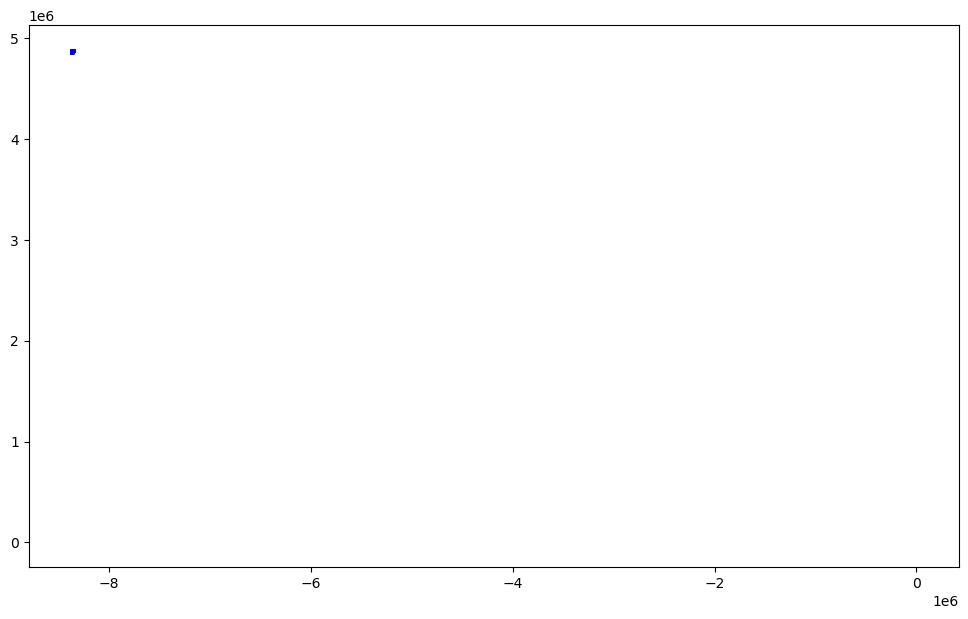

In [48]:
fig, ax = plt.subplots(1, figsize=(12,12))

censusMap.plot(ax=ax, color='white', edgecolor='black')

accident_yr.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

<AxesSubplot:>

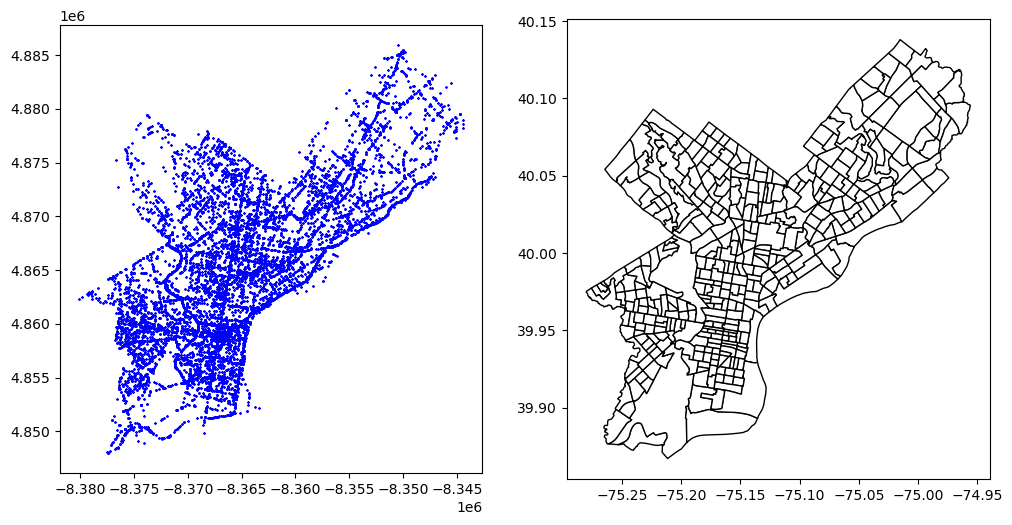

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))

censusMap.plot(ax=ax[1], color='white', edgecolor='black')

accident_yr.plot(marker='*', 
                   ax=ax[0], 
                   color='blue', 
                   markersize=1)

<AxesSubplot:>

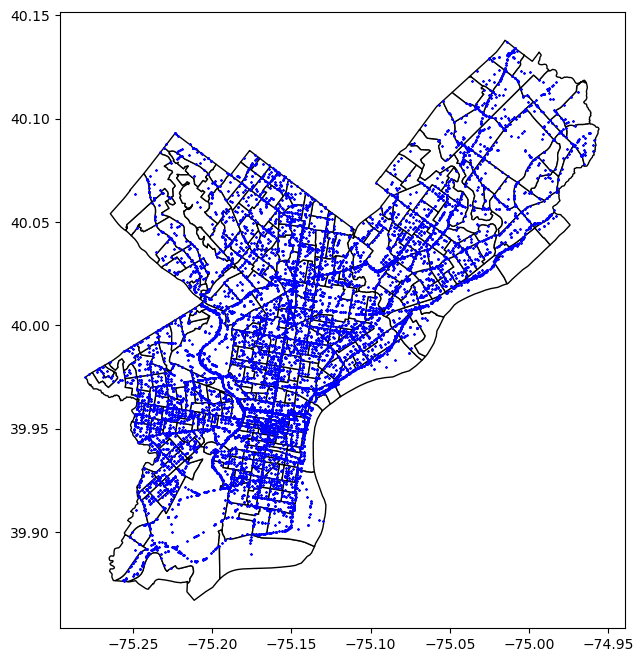

In [50]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

censusMap.plot(ax=ax, color='white', edgecolor='black')
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')
accident_yr_reprojected.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

In [51]:
accident_yr_reprojected = accident_yr.to_crs('EPSG:4269')

accident_yr_reprojected.head()

county_nam  objectid_1  objectid         crn  district  county  \
34175       None       34176    405616  2014049838         6      67   
34176       None       34177    405617  2014049892         6      67   
34177       None       34178    405618  2014052474         6      67   
34178       None       34179    405625  2014059008         6      67   
34179       None       34180    405632  2014068002         6      67   

       municipali  crash_year  crash_mont  day_of_wee  ...  ped_count  \
34175       67301        2014           3           6  ...          0   
34176       67301        2014           4           3  ...          0   
34177       67301        2014           5           7  ...          0   
34178       67301        2014           5           6  ...          0   
34179       67301        2014           5           6  ...          0   

       ped_death_  ped_maj_in  max_severi  comm_veh_c  dec_lat  dec_long  \
34175           0           0           8           0  40.0290  -75.1061   
34176           0           0           8           0  39.9866  -75.2052   
34177           0           0           0           0  39.9584  -75.1807   
34178           0           0           8           0  39.9956  -75.1725   
34179           0           0           8           0  40.0576  -75.0765   

      rdwy_surf_ wz_law_off                    geometry  
34175       None       None  POINT (-75.10610 40.02900)  
34176       None       None  POINT (-75.20520 39.98660)  
34177       None       None  POINT (-75.18070 39.95840)  
34178       None       None  POINT (-75.17250 39.99560)  
34179       None       None  POINT (-75.07650 40.05760)  

[5 rows x 91 columns]

In [ ]:
# Lab 3 Homework:

In [ ]:
# Create the map of car crash in in 2015 on Monday, 2016 on Monday, and 2017 on Monday
# Use different colors for years of 2015, 2016, and 2017

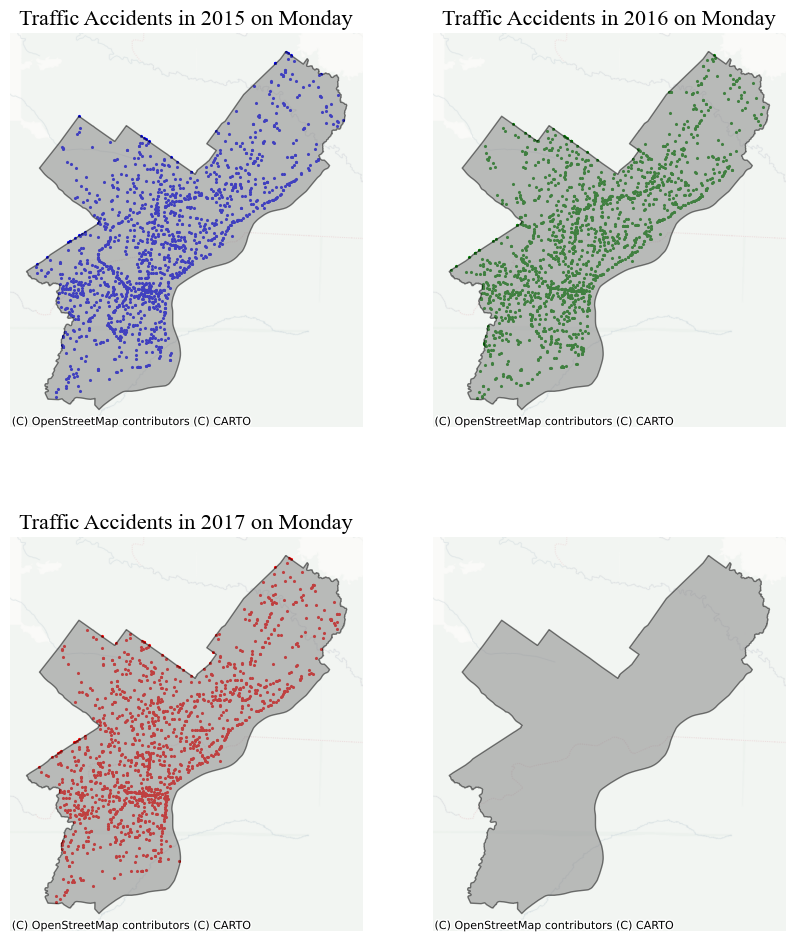

In [82]:
# first prepare the shapefile of the car crash in Phily
crash_data_shp = 'data/crashdata/crash_data_collision_crash_2007_2017.shp'

car_crash_df = gpd.read_file(crash_data_shp)

car_crash_df_reprojected = car_crash_df.to_crs('EPSG:2272')

phily_limit_df_2272 = phily_limit_df_3857.to_crs('EPSG:2272')

accident_yr_reprojected = accident_yr.to_crs('EPSG:2272')

accident = car_crash_df_reprojected

fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# check the accident in 2015 and Monday,
accident_yr_reprojected = accident.loc[(accident['crash_year'] == 2015) & (accident['day_of_wee'] == 2)]
accident_yr_reprojected.plot(marker='*', ax=ax[0][0], color='blue', markersize=2)
ax[0][0].set_title('Traffic Accidents in 2015 on Monday', fontsize='16', fontname='Times New Roman')

# plot the city limit
phily_limit_df_2272.plot(ax=ax[0][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][0], source=ctx.providers.CartoDB.Positron)
ax[0][0].set_axis_off()


# check the accident in 2016 and Monday,
accident_yr_reprojected = accident.loc[(accident['crash_year'] == 2016) & (accident['day_of_wee'] == 2)]
accident_yr_reprojected.plot(marker='*', ax=ax[0][1], color='green', markersize=2)
ax[0][1].set_title('Traffic Accidents in 2016 on Monday', fontsize='16', fontname='Times New Roman')
phily_limit_df_2272.plot(ax=ax[0][1], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[0][1], source=ctx.providers.CartoDB.Positron)
ax[0][1].set_axis_off()

# check the accident in 2017 and Monday,
accident_yr_reprojected = accident.loc[(accident['crash_year'] == 2017) & (accident['day_of_wee'] == 2)]
accident_yr_reprojected.plot(marker='*', ax=ax[1][0], color='red', markersize=2)
ax[1][0].set_title('Traffic Accidents in 2017 on Monday', fontsize='16', fontname='Times New Roman')
phily_limit_df_2272.plot(ax=ax[1][0], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[1][0], source=ctx.providers.CartoDB.Positron)
ax[1][0].set_axis_off()

# basemap
phily_limit_df_2272.plot(ax=ax[1][1], alpha=0.5, color='grey', edgecolor='k')
ctx.add_basemap(ax[1][1], source=ctx.providers.CartoDB.Positron)
ax[1][1].set_axis_off()

In [ ]:
# Reproject the traffic accident data and census tract data into projection with epsg of 2272 and overlay them together

In [91]:
import geopandas as gpd
censusMap = gpd.read_file("data/census-tract-data/census-tract-data.shp")

In [92]:
accident_yr_reprojected = accident_yr.to_crs('EPSG:2272')

In [94]:
accident_yr_reprojected.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [93]:
censusMap_reprojected = censusMap.to_crs('EPSG:2272')

In [95]:
censusMap_reprojected.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

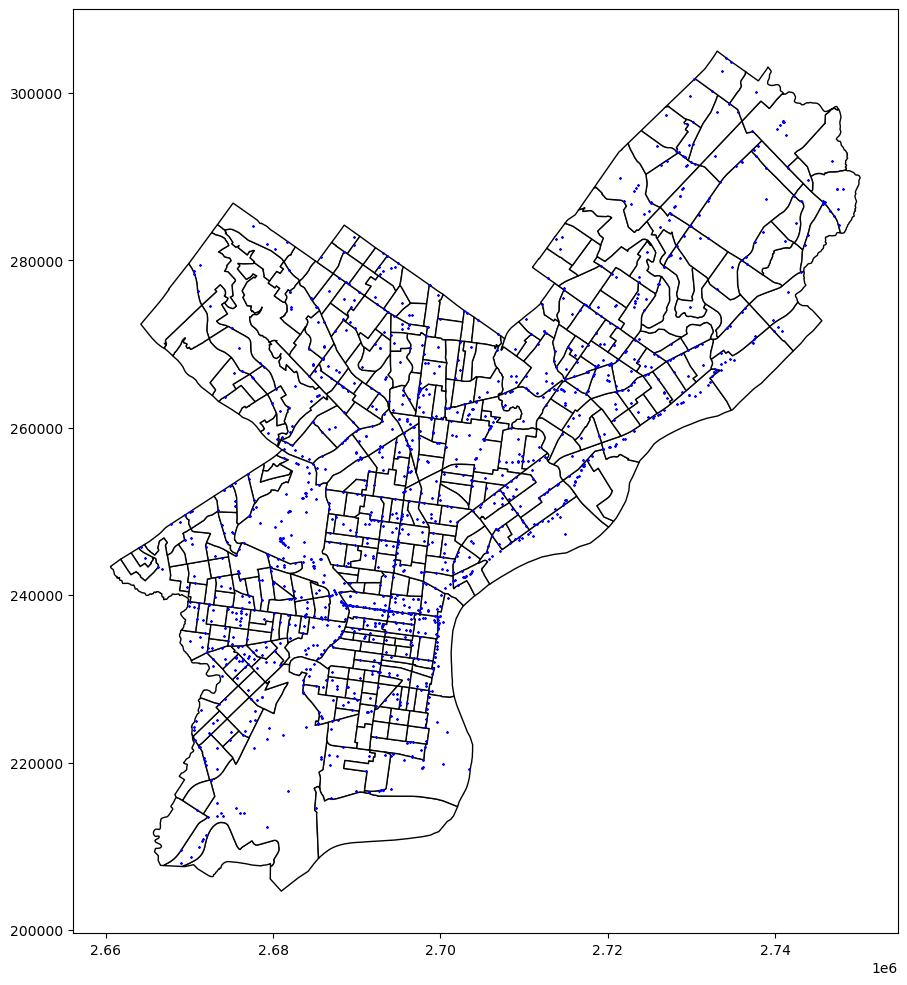

In [96]:
fig, ax = plt.subplots(1, figsize=(12,12))

censusMap_reprojected.plot(ax=ax, color='white', edgecolor='black')

accident_yr_reprojected.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)